In [1]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MinMaxScaler

In [2]:
# load the dataset 
df = pd.read_csv('data.csv', encoding='unicode_escape')

In [3]:
df.shape

(541909, 8)

Dataset has 541909 rows and 8 columns

In [4]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

Following 8 are the columns in the dataset: 'InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'

In [5]:
df.dtypes  # dtypes tells the datatype of each column

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [6]:
df.head(5)  # Shows the first 5 rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


DATA CLEANING

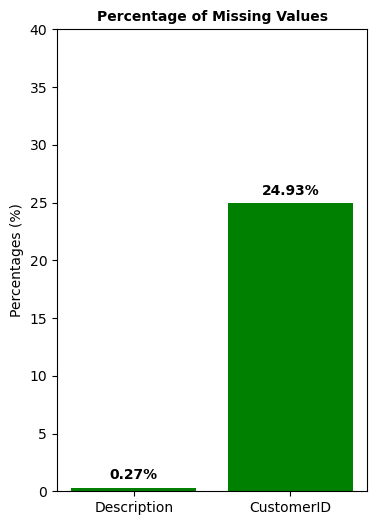

In [8]:
# Checking missing values and calculating the count (if any)

missing_data = df.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / df.shape[0]) * 100
missing_percentage.sort_values(ascending=True, inplace=True)

fig, ax = plt.subplots(figsize=(4, 6))
ax.bar(missing_percentage.index, missing_percentage, color='green')


for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(i, value + 0.5, f"{value:.2f}%", ha='center', va='bottom', fontweight='bold', fontsize=10, color='black')

ax.set_ylim([0, 40])

plt.title("Percentage of Missing Values", fontweight='bold', fontsize=10)
plt.ylabel('Percentages (%)', fontsize=10)
plt.xticks(rotation=0)
plt.show()

In [9]:
# Extracting rows with missing values in 'CustomerID' or 'Description' columns
df[df['CustomerID'].isnull() | df['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


By removing rows with missing values in the CustomerID and Description columns, we aim to construct a cleaner and more reliable dataset, which is essential for achieving accurate clustering and creating an effective recommendation system.

In [10]:
# Removing rows with missing values in 'CustomerID' and 'Description' columns
df = df.dropna(subset=['CustomerID', 'Description'])

In [11]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [12]:
df.duplicated().sum()  # checking for duplicate values 

5225

In [13]:
df= df.drop_duplicates() # dropping the duplicate entries

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape  # this is the new size of the dataset i.e., 401604 rows and 8 columns

(401604, 8)

EDA

In [16]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


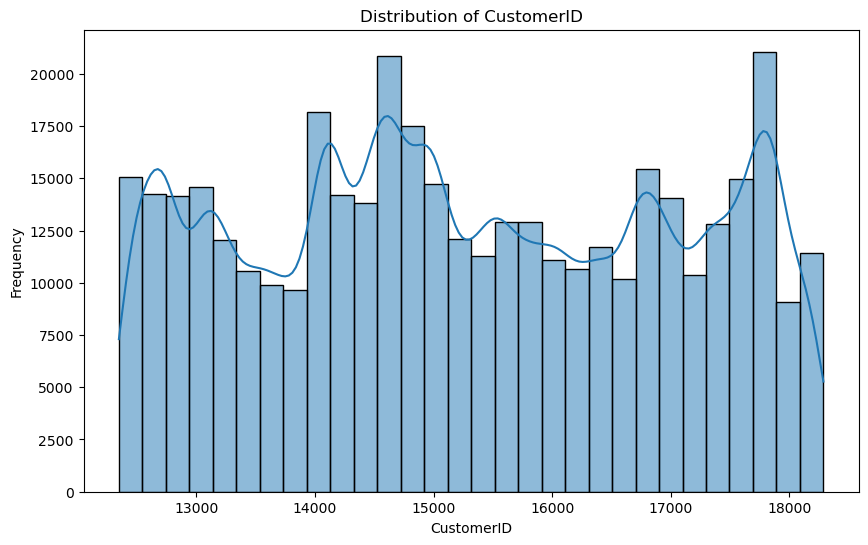

In [17]:
# Plot distribution of CustomerID (converted to integer for plotting purposes)
plt.figure(figsize=(10, 6))
sns.histplot(df['CustomerID'].dropna().astype(int), kde=True, bins=30)
plt.title('Distribution of CustomerID')
plt.xlabel('CustomerID')
plt.ylabel('Frequency')
plt.show()

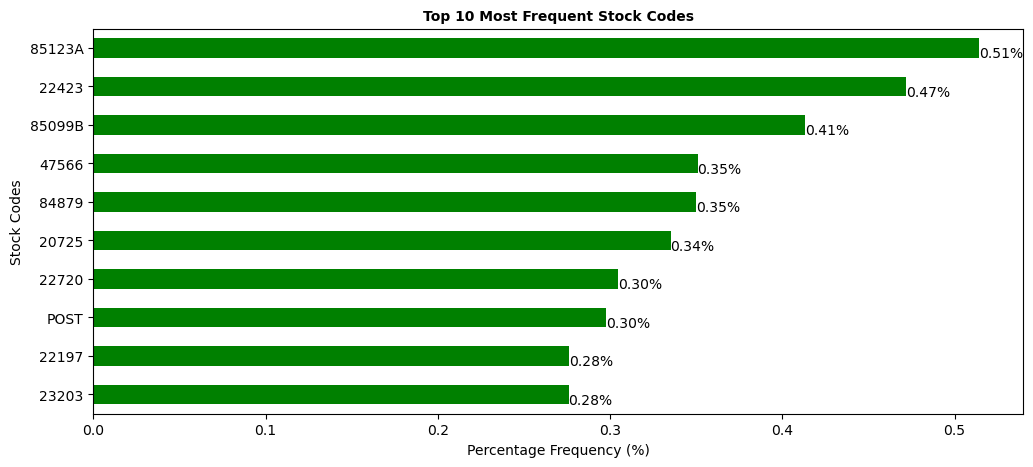

In [18]:
# Identifying top 10 most frequent stock codes
top_10_stock_codes = df['StockCode'].value_counts(normalize=True).head(10) * 100

plt.figure(figsize=(12, 5))
top_10_stock_codes.plot(kind='barh', color='green')

for index, value in enumerate(top_10_stock_codes):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Top 10 Most Frequent Stock Codes', fontweight='bold', fontsize=10)
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Stock Codes')
plt.gca().invert_yaxis()
plt.show()


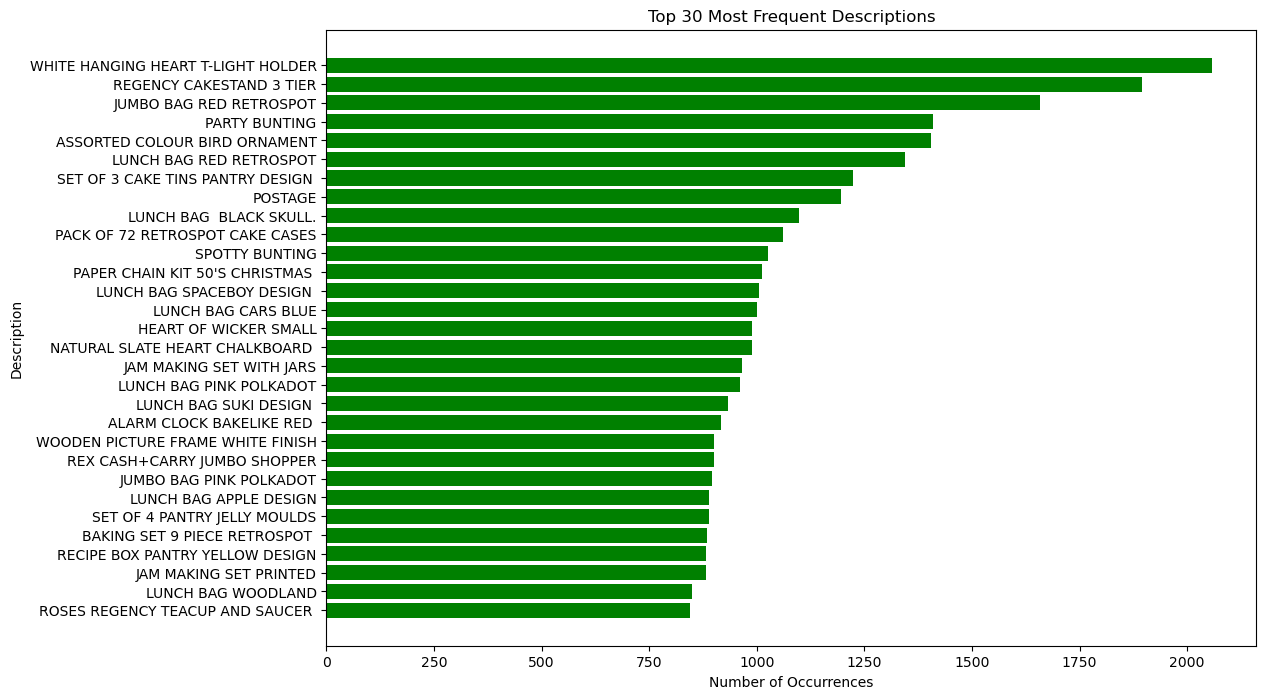

In [19]:
# Calculate the occurrence of each unique description and sort them
description_counts = df['Description'].value_counts()

# Get the top 30 descriptions
top_30_descriptions = description_counts[:30]

plt.figure(figsize=(12,8))
plt.barh(top_30_descriptions.index[::-1], top_30_descriptions.values[::-1], color='green')

plt.xlabel('Number of Occurrences')
plt.ylabel('Description')
plt.title('Top 30 Most Frequent Descriptions')
plt.show()

Feature Engineering 

Create RFM Features

RFM is a method used for analyzing customer value and segmenting the customer base. It is an acronym that stands for:

Recency (R): This metric indicates how recently a customer has made a purchase. A lower recency value means the customer has purchased more recently, indicating higher engagement with the brand.

Frequency (F): This metric signifies how often a customer makes a purchase within a certain period. A higher frequency value indicates a customer who interacts with the business more often, suggesting higher loyalty or satisfaction.

Monetary (M): This metric represents the total amount of money a customer has spent over a certain period. Customers who have a higher monetary value have contributed more to the business, indicating their potential high lifetime value.

Together, these metrics help in understanding a customer's buying behavior and preferences, which is pivotal in personalizing marketing strategies and creating a recommendation system.

In [20]:
# Ensure InvoiceDate is datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Find the latest date
latest_date = df['InvoiceDate'].max()

# Create RFM table
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,
    'InvoiceNo': 'count',
    'UnitPrice': 'sum'
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'UnitPrice': 'Monetary'
})
print(rfm.head())

            Recency  Frequency  Monetary
CustomerID                              
12346.0         325          2      2.08
12347.0           1        182    481.21
12348.0          74         31    178.71
12349.0          18         73    605.10
12350.0         309         17     65.30


In [21]:
rfm.describe()

,Recency,Frequency,Monetary
count,4372.000000,4372.000000,4372.000000
mean,91.047118,91.858188,319.121193
std,100.765435,229.223566,1281.010819
min,0.000000,1.000000,0.000000
25%,16.000000,17.000000,52.730000
50%,49.000000,41.000000,128.925000
75%,142.000000,99.250000,299.097500
max,373.000000,7812.000000,41376.330000


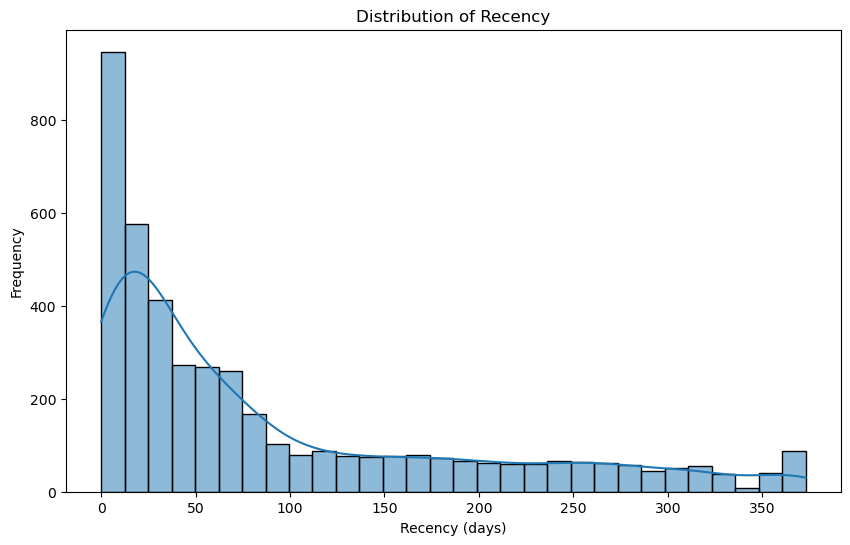

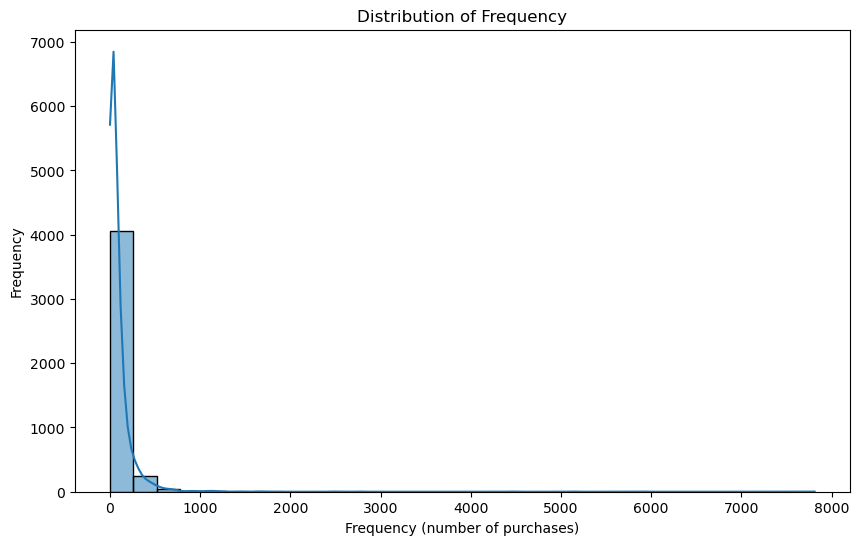

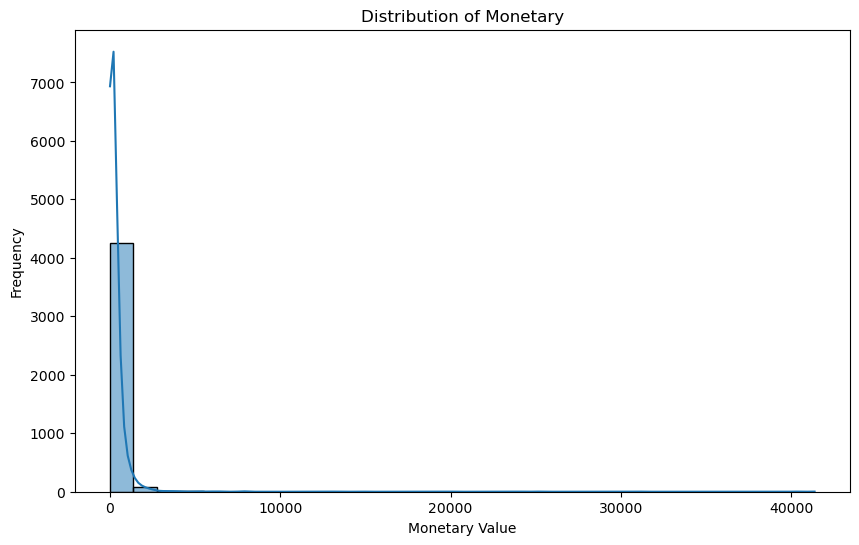

In [22]:
# Plot distribution of Recency
plt.figure(figsize=(10, 6))
sns.histplot(rfm['Recency'], kde=True, bins=30)
plt.title('Distribution of Recency')
plt.xlabel('Recency (days)')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of Frequency
plt.figure(figsize=(10, 6))
sns.histplot(rfm['Frequency'], kde=True, bins=30)
plt.title('Distribution of Frequency')
plt.xlabel('Frequency (number of purchases)')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of Monetary
plt.figure(figsize=(10, 6))
sns.histplot(rfm['Monetary'], kde=True, bins=30)
plt.title('Distribution of Monetary')
plt.xlabel('Monetary Value')
plt.ylabel('Frequency')
plt.show()

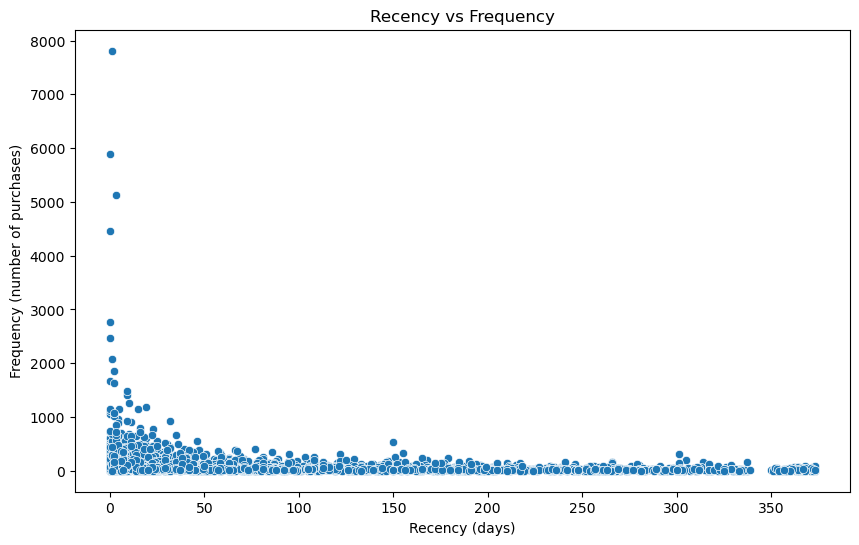

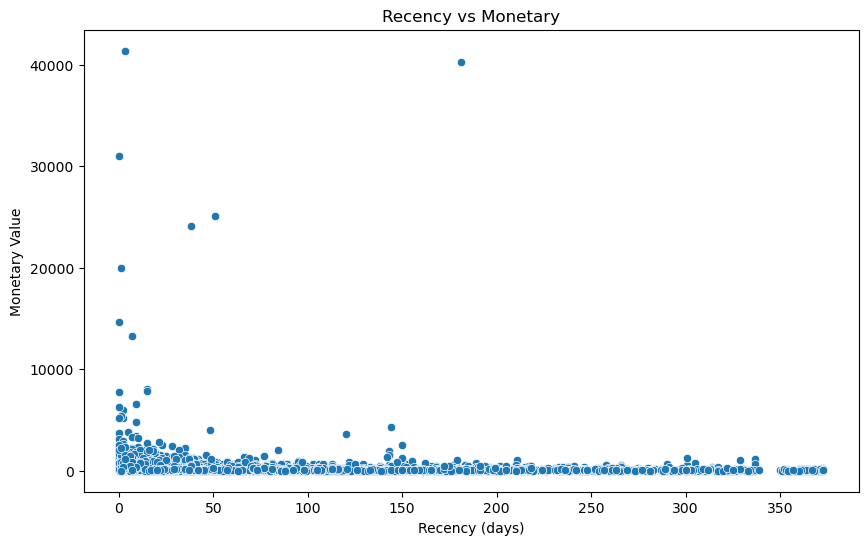

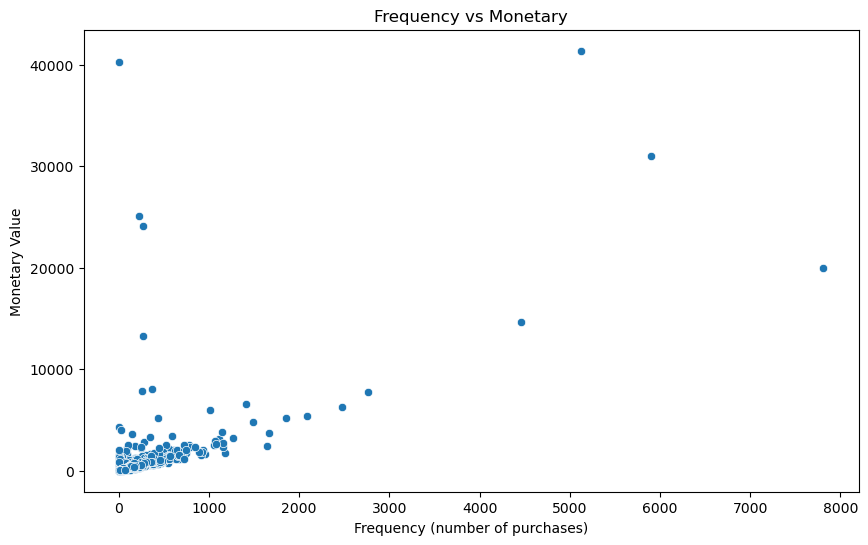

In [23]:
# Scatter plot of Recency vs Frequency
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Frequency', data=rfm)
plt.title('Recency vs Frequency')
plt.xlabel('Recency (days)')
plt.ylabel('Frequency (number of purchases)')
plt.show()

# Scatter plot of Recency vs Monetary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Monetary', data=rfm)
plt.title('Recency vs Monetary')
plt.xlabel('Recency (days)')
plt.ylabel('Monetary Value')
plt.show()

# Scatter plot of Frequency vs Monetary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Frequency', y='Monetary', data=rfm)
plt.title('Frequency vs Monetary')
plt.xlabel('Frequency (number of purchases)')
plt.ylabel('Monetary Value')
plt.show()

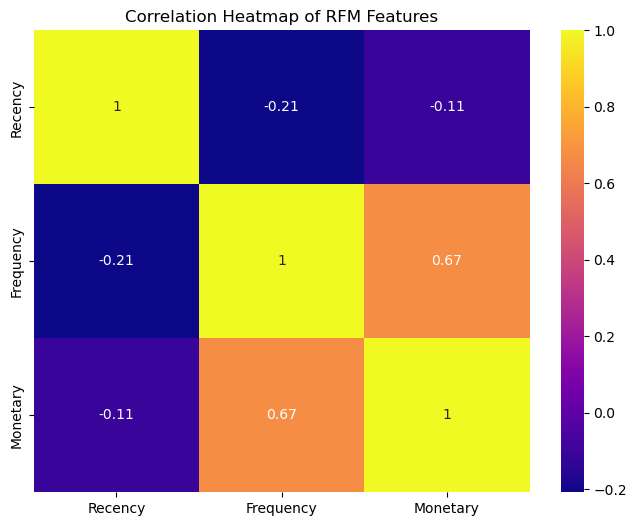

In [24]:
# Heatmap of correlations of RFM Features

plt.figure(figsize=(8, 6))
sns.heatmap(rfm.corr(), annot=True, cmap='plasma')
plt.title('Correlation Heatmap of RFM Features')
plt.show()

In [25]:
# Standardize the RFM features
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# Convert the scaled data back into a DataFrame
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=rfm.columns)
print(rfm_scaled_df.head())

    Recency  Frequency  Monetary
0  2.322023  -0.392056 -0.247521
1 -0.893733   0.393293  0.126546
2 -0.169196  -0.265527 -0.109622
3 -0.725005  -0.082279  0.223270
4  2.163220  -0.326610 -0.198164


Unsupervised Learning

K-Means Clustering

In [26]:
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(rfm_scaled)
rfm['Cluster'] = cluster_labels
print(rfm.head())

            Recency  Frequency  Monetary  Cluster
CustomerID                                       
12346.0         325          2      2.08        1
12347.0           1        182    481.21        0
12348.0          74         31    178.71        0
12349.0          18         73    605.10        0
12350.0         309         17     65.30        1


Cluster
0    3035
1    1065
4     265
3       4
2       3
Name: count, dtype: int64
            Recency    Frequency      Monetary
Cluster                                       
0         42.403954    71.347941    220.649843
1        249.230986    27.339906     98.522405
2         90.000000   168.000000  29829.783333
3          1.000000  5824.250000  26764.075000
4         13.800000   498.660377   1600.202151


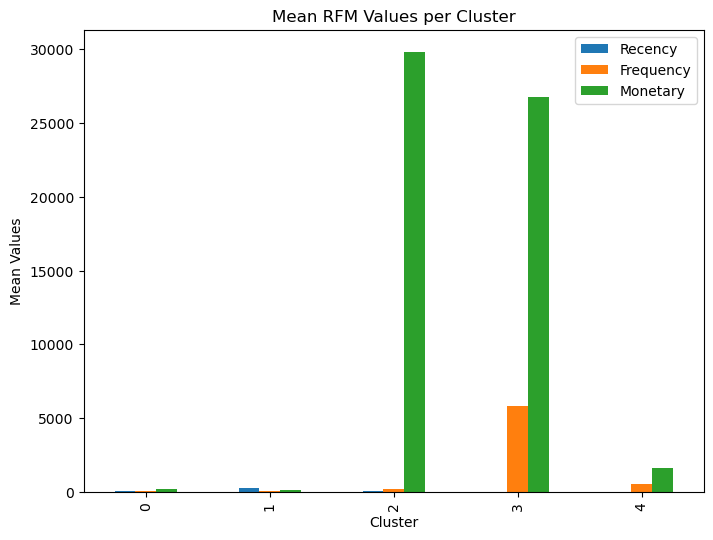

In [27]:
# Count the number of customers in each cluster
cluster_counts = rfm['Cluster'].value_counts()
print(cluster_counts)

# Calculate the mean RFM values for each cluster
cluster_means = rfm.groupby('Cluster').mean()
print(cluster_means)

# Plot the mean RFM values for each cluster
cluster_means.plot(kind='bar', figsize=(8, 6))
plt.title('Mean RFM Values per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Values')
plt.show()

C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x2000 with 0 Axes>

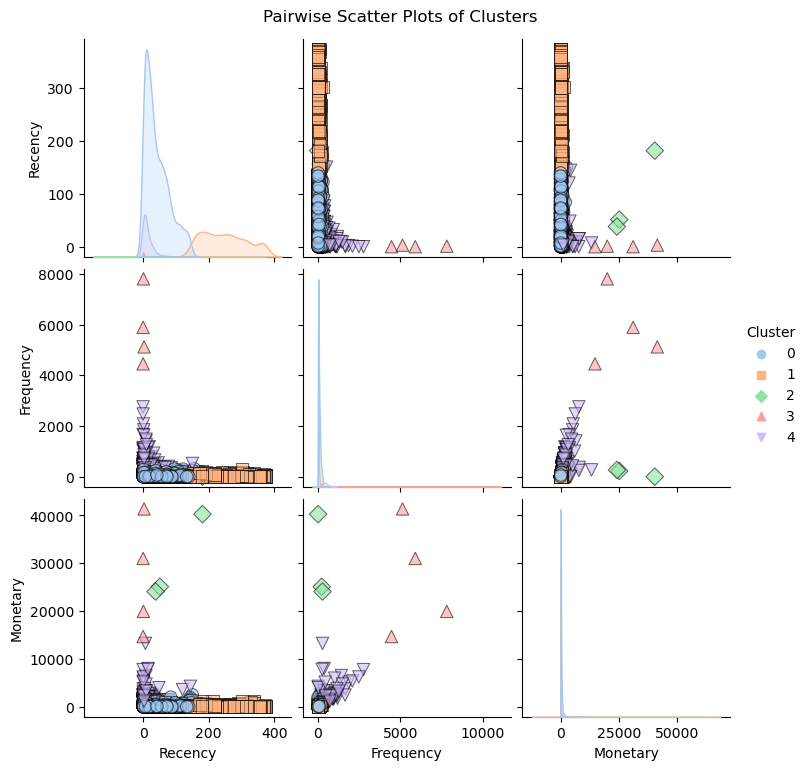

In [28]:
plt.figure(figsize=(12, 20))

# Create pairwise scatter plots for each cluster
g = sns.pairplot(rfm, hue='Cluster', palette='pastel', 
                 plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, 
                 markers=["o", "s", "D", "^", "v"])

g.fig.suptitle("Pairwise Scatter Plots of Clusters", y=1.02)
plt.show()

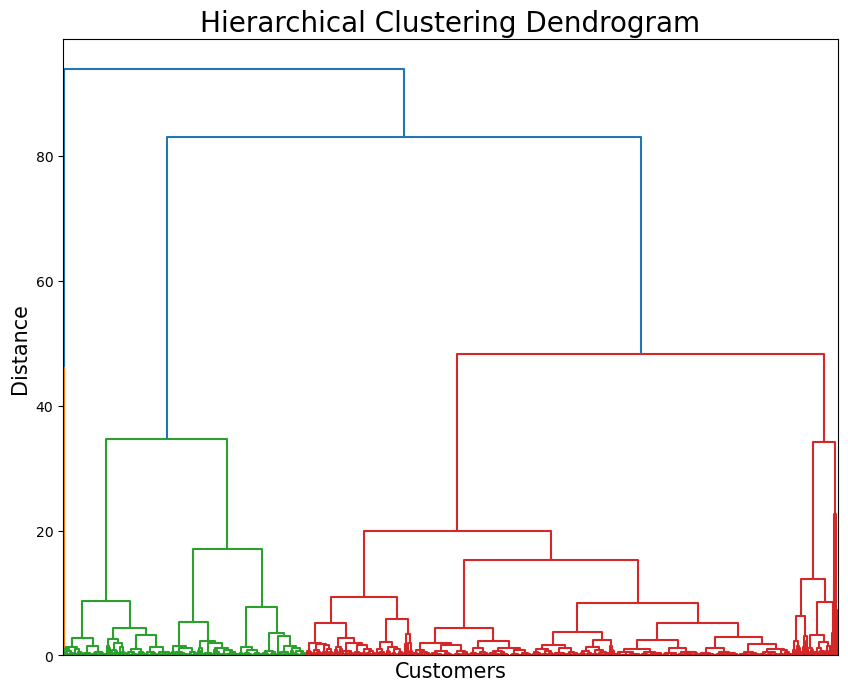

            Recency  Frequency  Monetary  Cluster  H_Cluster
CustomerID                                                  
12346.0         325          2      2.08        1          0
12347.0           1        182    481.21        0          3
12348.0          74         31    178.71        0          3
12349.0          18         73    605.10        0          3
12350.0         309         17     65.30        1          0


In [29]:
# Hierarchical Clustering

# Apply Agglomerative Clustering
hier_clustering = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
rfm['H_Cluster'] = hier_clustering.fit_predict(rfm_scaled)

# Plotting the dendrogram
linked = linkage(rfm_scaled, method='ward')
plt.figure(figsize=(10, 8))
dendrogram(linked, orientation='top', no_labels=True)
plt.title('Hierarchical Clustering Dendrogram', fontsize=20)
plt.xlabel('Customers', fontsize=15)
plt.ylabel('Distance', fontsize=15)
plt.show()
print(rfm.head())

In [30]:
silhouette_avg = silhouette_score(rfm_scaled, cluster_labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.6188920227420747


Supervised Learning

In [31]:
# Prepare the data for classification
X = rfm[['Recency', 'Frequency', 'Monetary']]
y = rfm['Cluster']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [32]:
#Decision Tree Classification

# Train a Decision Tree classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# Make predictions on the testing set with Decision Tree
y_pred_dt = dt_clf.predict(X_test)

print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt, zero_division=0))

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       607
           1       0.99      1.00      0.99       213
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         1
           4       0.96      0.92      0.94        53

    accuracy                           0.99       875
   macro avg       0.79      0.78      0.79       875
weighted avg       0.99      0.99      0.99       875



In [33]:
#Logistic Regression classifier

# Train a Logistic Regression classifier with increased max_iter
lr_clf = LogisticRegression(max_iter=2000, random_state=42)
lr_clf.fit(X_train, y_train)

# Make predictions on the testing set with Logistic Regression
y_pred_lr = lr_clf.predict(X_test)

print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr, zero_division=0))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       607
           1       1.00      1.00      1.00       213
           2       0.50      1.00      0.67         1
           3       0.00      0.00      0.00         1
           4       0.98      0.98      0.98        53

    accuracy                           1.00       875
   macro avg       0.70      0.80      0.73       875
weighted avg       1.00      1.00      1.00       875



In [34]:
#Random Forest classifier

# Train a Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions on the testing set with Random Forest
y_pred_rf = rf_clf.predict(X_test)

print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf, zero_division=0))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       607
           1       1.00      1.00      1.00       213
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         1
           4       0.98      0.94      0.96        53

    accuracy                           0.99       875
   macro avg       0.79      0.79      0.79       875
weighted avg       0.99      0.99      0.99       875



Recommendation System 

In [35]:
# Created a user-item matrix
user_item_matrix = df.pivot_table(index='CustomerID', columns='StockCode', values='UnitPrice', aggfunc='sum').fillna(0)

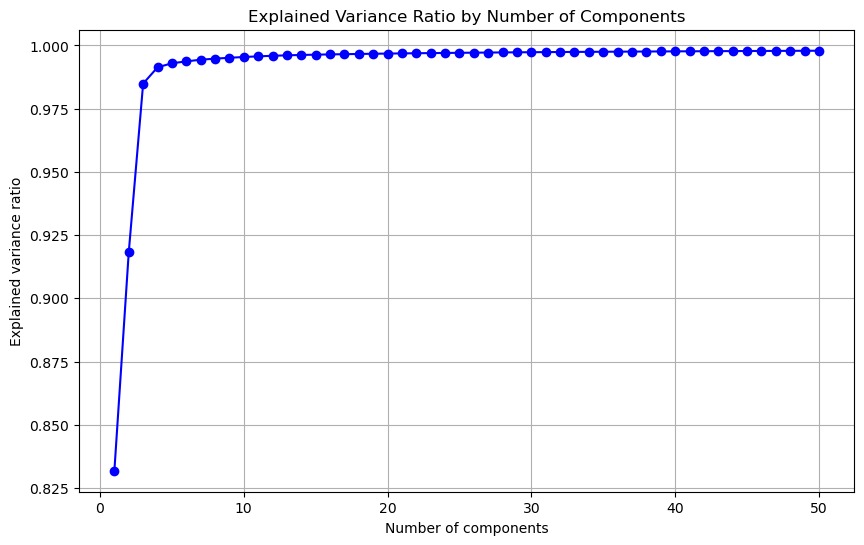

In [36]:
# Determine the optimal number of components using explained variance ratio
explained_variance = []
components_range = range(1, 51)
for n_components in components_range:
    svd = TruncatedSVD(n_components=n_components, random_state=42)
    svd.fit(user_item_matrix)
    explained_variance.append(svd.explained_variance_ratio_.sum())

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(components_range, explained_variance, 'bo-')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.title('Explained Variance Ratio by Number of Components')
plt.grid(True)
plt.show()

# Choose the optimal number of components
optimal_components = 20
svd = TruncatedSVD(n_components=optimal_components, random_state=42)
matrix_reduced = svd.fit_transform(user_item_matrix)

# Reconstruct the matrix
matrix_reconstructed = np.dot(matrix_reduced, svd.components_)

# Convert to DataFrame for easier handling
matrix_reconstructed_df = pd.DataFrame(matrix_reconstructed, index=user_item_matrix.index, columns=user_item_matrix.columns)


In [37]:
# Function to recommend products
def recommend_products(user_id, n=5):
    user_predictions = matrix_reconstructed_df.loc[user_id]
    user_purchases = user_item_matrix.loc[user_id]
    recommendations = user_predictions[user_purchases == 0].sort_values(ascending=False).head(n)
    return recommendations

In [38]:
# Example: Recommend products for a specific user
user_id = 15062  # Replace with a valid user ID from your dataset
recommendations = recommend_products(user_id)
print(f"Top {len(recommendations)} recommendations for user {user_id}:")
print(recommendations)

# Map StockCodes to Product Descriptions
product_descriptions = df[['StockCode', 'Description']].drop_duplicates().set_index('StockCode')['Description'].to_dict()

# Add product descriptions to the recommendations
recommendations_with_description = recommendations.rename(index=product_descriptions)
print(f"Top {len(recommendations)} recommendations for user {user_id}:")
print(recommendations_with_description)

Top 5 recommendations for user 15062:
StockCode
20685    1.213173
48187    0.994081
48138    0.854267
48194    0.841322
48184    0.828659
Name: 15062.0, dtype: float64
Top 5 recommendations for user 15062:
StockCode
DOORMAT RED RETROSPOT    1.213173
DOORMAT NEW ENGLAND      0.994081
DOORMAT UNION FLAG       0.854267
DOORMAT HEARTS           0.841322
DOORMAT ENGLISH ROSE     0.828659
Name: 15062.0, dtype: float64
